In [57]:
import tensorflow as tf

# Model Training #

In [58]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0770 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0605 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.025

# Accuracy #

In [59]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9742
0.10759314149618149 0.9742000102996826


# Saving The Model #

In [60]:
model.save('numbers.model')

INFO:tensorflow:Assets written to: numbers.model/assets


INFO:tensorflow:Assets written to: numbers.model/assets


# Test Predictions #

313/313 [==============================] - 1s 2ms/step


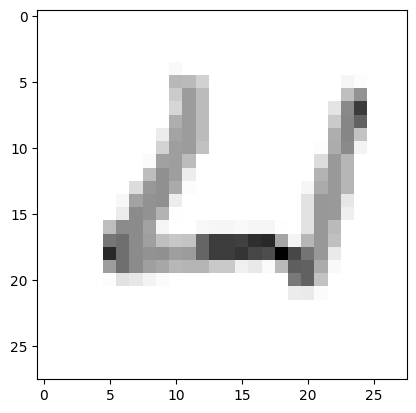

In [63]:
import matplotlib.pyplot as plt

new_model = tf.keras.models.load_model('numbers.model')
predictions = new_model.predict([x_test])

plt.imshow(x_test[33], cmap = plt.cm.binary)
plt.show()

In [64]:
import numpy as np
print(np.argmax(predictions[33]))

4


# User Images #

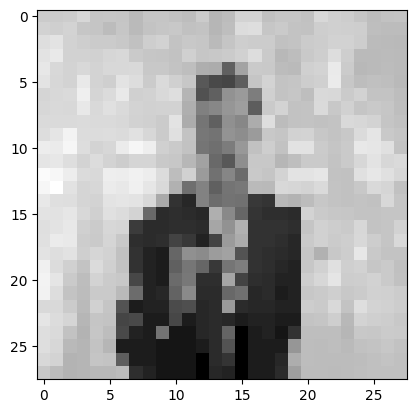

In [94]:
import cv2
import matplotlib.pyplot as plt

img_file = 'test15.png'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')
plt.show()

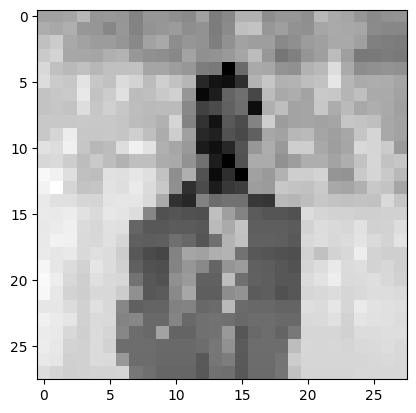

In [95]:
img_resized = cv2.resize(img, (28, 28), interpolation = cv2.INTER_LINEAR)
img_resized = np.invert(img_resized)
img_resized = tf.keras.utils.normalize(img_resized, axis = 1)

plt.imshow(img_resized, cmap = plt.cm.binary)
plt.show()

In [96]:
prediction = new_model.predict(np.array([img_resized]))
print(np.argmax(prediction))

1/1 [==============================] - 0s 33ms/step
8
